<p style="text-align:center">
    <a href="https://github.com/salimt">
    <img src="https://i.imgur.com/7bgtWRh.jpeg" width="200" alt="Skills Network Logo">
    </a>
</p>


## ML Pipeline for Airfoil noise prediction using PySpark


## Scenario


As a data engineer at an aeronautics consulting firm renowned for its efficient airfoil design for planes and sports cars, my role involves facilitating data preparation and constructing machine learning pipelines. In this project, we'll be working with a modified version of the NASA Airfoil Self Noise dataset. Our objective is to clean the dataset by removing duplicate rows and eliminating any entries with null values. Subsequently, we'll develop a machine learning pipeline to create a predictive model that estimates sound levels based on all other available columns. Following model evaluation, we'll finalize the process by persisting the model for future use.

## Objectives

### Part 1: Execute ETL Operations
- Load a CSV dataset.
- Eliminate any duplicate entries.
- Remove rows containing null values.
- Apply necessary transformations.
- Save the cleansed data in the Parquet format.

### Part 2: Construct a Machine Learning Pipeline
- Develop a machine learning pipeline for prediction.

### Part 3: Assess the Model
- Assess the model's performance using appropriate metrics.

### Part 4: Preserve the Model
- Save the model for future deployment purposes.
- Load and validate the stored model.



## Datasets

 - The original dataset can be found here NASA airfoil self noise dataset. https://archive.ics.uci.edu/dataset/291/airfoil+self+noise

Diagram of an airfoil. - For informational purpose


![Airfoil with flow](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-BD0231EN-Coursera/images/Airfoil_with_flow.png)


Diagram showing the Angle of attack. - For informational purpose


![Airfoil angle of attack](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-BD0231EN-Coursera/images/Airfoil_angle_of_attack.jpg)


## Setup


*   [`PySpark`](https://spark.apache.org/docs/latest/api/python/index.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMSkillsNetworkBD0231ENCoursera2789-2023-01-01) for connecting to the Spark Cluster


### Installing Required Libraries


In [3]:
!pip install pyspark==3.1.2 -q
!pip install findspark -q

### Importing Required Libraries

In [4]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from pyspark.sql import SparkSession
import findspark

findspark.init()

## Part 1 - Perform ETL activity


### Create a spark session


In [5]:
spark = SparkSession.builder.appName("ETL using Spark").getOrCreate()

### Load the csv file into a dataframe


Download the data file.

In [6]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-BD0231EN-Coursera/datasets/NASA_airfoil_noise_raw.csv

--2024-02-05 16:16:16--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-BD0231EN-Coursera/datasets/NASA_airfoil_noise_raw.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60682 (59K) [text/csv]
Saving to: ‘NASA_airfoil_noise_raw.csv’

NASA_airfoil_noise_ 100%[===================>]  59.26K  --.-KB/s    in 0.03s   

2024-02-05 16:16:16 (2.27 MB/s) - ‘NASA_airfoil_noise_raw.csv’ saved [60682/60682]



Load the dataset into the spark dataframe


In [7]:
df = spark.read.csv("NASA_airfoil_noise_raw.csv", header=True, inferSchema=True)

In [8]:
df.head(5)

[Row(Frequency=800, AngleOfAttack=0.0, ChordLength=0.3048, FreeStreamVelocity=71.3, SuctionSideDisplacement=0.00266337, SoundLevel=126.201),
 Row(Frequency=1000, AngleOfAttack=0.0, ChordLength=0.3048, FreeStreamVelocity=71.3, SuctionSideDisplacement=0.00266337, SoundLevel=125.201),
 Row(Frequency=1250, AngleOfAttack=0.0, ChordLength=0.3048, FreeStreamVelocity=71.3, SuctionSideDisplacement=0.00266337, SoundLevel=125.951),
 Row(Frequency=1600, AngleOfAttack=0.0, ChordLength=0.3048, FreeStreamVelocity=71.3, SuctionSideDisplacement=0.00266337, SoundLevel=127.591),
 Row(Frequency=2000, AngleOfAttack=0.0, ChordLength=0.3048, FreeStreamVelocity=71.3, SuctionSideDisplacement=0.00266337, SoundLevel=127.461)]

## Data Preprocessing

#### Dropping Duplicates
Duplicate rows are removed from the dataset to ensure each observation is unique. This helps prevent biases in analysis caused by redundant data.

#### Handling Missing Values
Rows containing null values are dropped from the dataset to maintain data integrity. This ensures that analyses are based on complete and reliable information.

#### Column Renaming
The column named "SoundLevel" is renamed to "SoundLevelDecibels" for clarity and consistency in column naming conventions. This step enhances the interpretability of the dataset and facilitates downstream analysis.

In [9]:
rowcount1 = df.count()
print(rowcount1)

1522


### Drop all the duplicate rows


In [10]:
df = df.dropDuplicates()
rowcount2 = df.count()
print(rowcount2)

1503


### Drop all the rows that contain null values


In [11]:
df=df.dropna()
rowcount3 = df.count()
print(rowcount3)



1499


### Rename the column "SoundLevel" to "SoundLevelDecibels"


In [12]:
df = df.withColumnRenamed("SoundLevel","SoundLevelDecibels")
df.columns

['Frequency',
 'AngleOfAttack',
 'ChordLength',
 'FreeStreamVelocity',
 'SuctionSideDisplacement',
 'SoundLevelDecibels']

### Save the dataframe in parquet formant


In [13]:
df.write.mode("overwrite").parquet("NASA_airfoil_noise_cleaned.parquet")

#### Part 1 - Evaluation


In [14]:
print("Part 1 - Evaluation")

print("Total rows = ", rowcount1)
print("Total rows after dropping duplicate rows = ", rowcount2)
print("Total rows after dropping duplicate rows and rows with null values = ", rowcount3)
print("New column name = ", df.columns[-1])

import os

print("NASA_airfoil_noise_cleaned.parquet exists :", os.path.isdir("NASA_airfoil_noise_cleaned.parquet"))

Part 1 - Evaluation
Total rows =  1522
Total rows after dropping duplicate rows =  1503
Total rows after dropping duplicate rows and rows with null values =  1499
New column name =  SoundLevelDecibels
NASA_airfoil_noise_cleaned.parquet exists : True


## Part - 2 Create a  Machine Learning Pipeline


### Load data from parquet into a dataframe


In [15]:
df = spark.read.parquet("NASA_airfoil_noise_cleaned.parquet")
rowcount4 = df.count()
print(rowcount4)

1499


### Define the VectorAssembler pipeline stage


By converting features into a unified format, the VectorAssembler enhances algorithm compatibility and leverages PySpark's distributed computing for efficient processing of large datasets, ensuring scalability and performance in machine learning workflows.

In [16]:

from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=['Frequency',
 'AngleOfAttack',
 'ChordLength',
 'FreeStreamVelocity',
 'SuctionSideDisplacement'], outputCol="features")

### Define the StandardScaler pipeline stage


By applying StandardScaler, potential issues related to feature magnitudes and variations are mitigated, leading to more stable and reliable model performance across diverse datasets.

In [17]:
from pyspark.ml.feature import StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")

### Define the LinearRegression pipeline stage


Linear Regression in this context, we aim to capture the linear association between the scaled features and the sound level decibels, enabling us to make predictions based on this relationship.

In [18]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol="scaledFeatures", labelCol="SoundLevelDecibels")

### Define the Lasso pipeline stage


Lasso regression, a variant of linear regression, introduces regularization by adding a penalty term that promotes sparsity in the model coefficients. This encourages simpler models with fewer non-zero coefficients, effectively selecting a subset of features and reducing overfitting.


In [19]:
lasso = LinearRegression(featuresCol="scaledFeatures", labelCol="SoundLevelDecibels", elasticNetParam=1.0, regParam=0.1)

### Define the ElasticNet  pipeline stage


ElasticNet regression is a generalized linear regression model that combines both L1 (Lasso) and L2 (Ridge) regularization penalties. It balances between feature selection (Lasso) and coefficient shrinkage (Ridge), offering a versatile approach to handle multicollinearity and overfitting in regression tasks.


In [21]:
from pyspark.ml.regression import GeneralizedLinearRegression

elastic_net = GeneralizedLinearRegression(featuresCol="scaledFeatures", labelCol="SoundLevelDecibels", family="gaussian", link="identity", regParam=0.1)


### Build the pipeline


Build a pipeline using the above three stages


In [22]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[assembler, scaler, lr])
lasso_pipeline = Pipeline(stages=[assembler, scaler, lasso])
elastic_pipeline = Pipeline(stages=[assembler, scaler, elastic_net])

### Split the data


The larger subset (70%) is designated for training the machine learning model, while the smaller subset (30%) is reserved for evaluating the model's performance. The seed=42 parameter ensures reproducibility by setting the random seed for the split.

In [23]:
(trainingData, testData) = df.randomSplit([0.7, 0.3], seed=42)

### Fit the pipeline


This process involves applying any data preprocessing steps, such as feature engineering or scaling, followed by training the model using the specified algorithm. Once fitted, the model encapsulates the learned patterns from the training data and is ready for evaluation and prediction tasks.

In [24]:
model = pipeline.fit(trainingData)

In [25]:
model2 = lasso_pipeline.fit(trainingData)

In [26]:
model3 = elastic_pipeline.fit(trainingData)

#### Part 2 - Evaluation


In [27]:
print("Part 2 - Evaluation")
print("Total rows = ", rowcount4)
ps = [str(x).split("_")[0] for x in pipeline.getStages()]
print("Linear Regression")
print("Pipeline Stage 1 = ", ps[0])
print("Pipeline Stage 2 = ", ps[1])
print("Pipeline Stage 3 = ", ps[2])

print("Label column = ", lr.getLabelCol())

print("\n")

ps = [str(x).split("_")[0] for x in lasso_pipeline.getStages()]
print("Lasso")
print("Pipeline Stage 1 = ", ps[0])
print("Pipeline Stage 2 = ", ps[1])
print("Pipeline Stage 3 = ", ps[2])

print("Label column = ", lr.getLabelCol())

print("\n")

ps = [str(x).split("_")[0] for x in elastic_pipeline.getStages()]
print("ElasticNet")
print("Pipeline Stage 1 = ", ps[0])
print("Pipeline Stage 2 = ", ps[1])
print("Pipeline Stage 3 = ", ps[2])

print("Label column = ", lr.getLabelCol())

Part 2 - Evaluation
Total rows =  1499
Linear Regression
Pipeline Stage 1 =  VectorAssembler
Pipeline Stage 2 =  StandardScaler
Pipeline Stage 3 =  LinearRegression
Label column =  SoundLevelDecibels


Lasso
Pipeline Stage 1 =  VectorAssembler
Pipeline Stage 2 =  StandardScaler
Pipeline Stage 3 =  LinearRegression
Label column =  SoundLevelDecibels


ElasticNet
Pipeline Stage 1 =  VectorAssembler
Pipeline Stage 2 =  StandardScaler
Pipeline Stage 3 =  GeneralizedLinearRegression
Label column =  SoundLevelDecibels


## Part 3 - Evaluate the Model


### Predict using the model


The resulting predictions are stored in the "predictions" DataFrame, which can then be used to evaluate the model's performance against the true labels or values in the test dataset. This step is crucial for assessing how well the trained model generalizes to new, unseen data and for validating its effectiveness in real-world scenarios.

In [28]:
predictions = model.transform(testData)
predictions2 = model2.transform(testData)
predictions3 = model3.transform(testData)

### MSE


The calculated MSE value quantifies the average squared difference between the predicted and actual values, providing a measure of the model's predictive accuracy. A lower MSE indicates better model performance, with values closer to zero indicating a more precise model.

In [29]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(labelCol="SoundLevelDecibels", predictionCol="prediction", metricName="mse")
mse = evaluator.evaluate(predictions)
print("Linear MSE =", mse)

Linear MSE = 25.005633149560463


In [30]:
evaluator = RegressionEvaluator(labelCol="SoundLevelDecibels", predictionCol="prediction", metricName="mse")
mse2 = evaluator.evaluate(predictions2)
print("Lasso MSE =", mse2)

Lasso MSE = 25.337662351914624


In [31]:
evaluator = RegressionEvaluator(labelCol="SoundLevelDecibels", predictionCol="prediction", metricName="mse")
mse3 = evaluator.evaluate(predictions3)
print("ElasticNet MSE =", mse3)

ElasticNet MSE = 25.123461720551557


### MAE


MAE value quantifies the average absolute difference between the predicted and actual values, providing another measure of the model's predictive accuracy. A lower MAE indicates better model performance, with values closer to zero indicating a more accurate model.

In [32]:
evaluator = RegressionEvaluator(labelCol="SoundLevelDecibels", predictionCol="prediction", metricName="mae")
mae = evaluator.evaluate(predictions)
print("Linear MAE =", mae)

Linear MAE = 3.870800827817513


In [33]:
evaluator = RegressionEvaluator(labelCol="SoundLevelDecibels", predictionCol="prediction", metricName="mae")
mae2 = evaluator.evaluate(predictions2)
print("Lasso MAE =", mae2)

Lasso MAE = 3.922395099708769


In [34]:
evaluator = RegressionEvaluator(labelCol="SoundLevelDecibels", predictionCol="prediction", metricName="mae")
mae3 = evaluator.evaluate(predictions3)
print("ElasticNet MAE =", mae3)

ElasticNet MAE = 3.893721314528024


### R-Squared(R2)


In [35]:
evaluator = RegressionEvaluator(labelCol="SoundLevelDecibels", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions)
print("Linear R2 =", r2)


Linear R2 = 0.5137496926589646


In [36]:
evaluator = RegressionEvaluator(labelCol="SoundLevelDecibels", predictionCol="prediction", metricName="r2")
r22 = evaluator.evaluate(predictions2)
print("Lasso R2 =", r22)


Lasso R2 = 0.5072931754124199


In [37]:
evaluator = RegressionEvaluator(labelCol="SoundLevelDecibels", predictionCol="prediction", metricName="r2")
r23 = evaluator.evaluate(predictions3)
print("ElasticNet R2 =", r23)


ElasticNet R2 = 0.5114584417830002


#### Part 3 - Evaluation


In [38]:
print("Part 3 - Evaluation")
print("Linear Regression")
print("Mean Squared Error = ", round(mse,2))
print("Mean Absolute Error = ", round(mae,2))
print("R Squared = ", round(r2,2))

lrModel = model.stages[-1]

print("Intercept = ", round(lrModel.intercept,2))


print("\n")
print("Lasso")
print("Mean Squared Error = ", round(mse2,2))
print("Mean Absolute Error = ", round(mae2,2))
print("R Squared = ", round(r22,2))

lassoModel = model2.stages[-1]

print("Intercept = ", round(lassoModel.intercept,2))

print("\n")
print("ElasticNet")
print("Mean Squared Error = ", round(mse3,2))
print("Mean Absolute Error = ", round(mae3,2))
print("R Squared = ", round(r23,2))

elasticN = model3.stages[-1]

print("Intercept = ", round(elasticN.intercept,2))

Part 3 - Evaluation
Linear Regression
Mean Squared Error =  25.01
Mean Absolute Error =  3.87
R Squared =  0.51
Intercept =  132.43


Lasso
Mean Squared Error =  25.34
Mean Absolute Error =  3.92
R Squared =  0.51
Intercept =  132.04


ElasticNet
Mean Squared Error =  25.12
Mean Absolute Error =  3.89
R Squared =  0.51
Intercept =  132.21


## Part 4 - Persist the Model


### Save the model


In [39]:
model.save("Final_Project")


### Load the model


In [40]:
loadedPipelineModel = model.load("Final_Project")


### Make predictions using the loaded model on the testdata


In [41]:
predictions = loadedPipelineModel.transform(testData)


### Task 4 - Show the predictions


In [42]:
predictions.select('SoundLevelDecibels', 'prediction').show(5)

+------------------+------------------+
|SoundLevelDecibels|        prediction|
+------------------+------------------+
|           128.545|121.03522307921861|
|           130.898|122.44608224351367|
|           109.951|127.63255285986469|
|           112.506|129.25004941528528|
|           130.089|122.16654986012581|
+------------------+------------------+
only showing top 5 rows



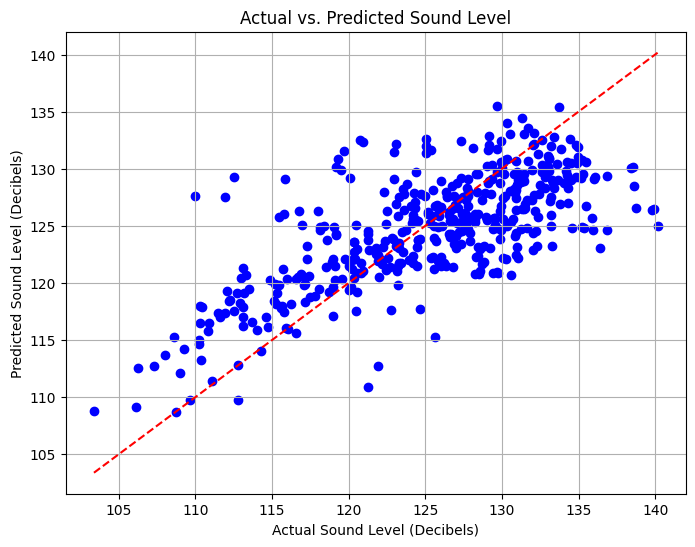

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'predictions' is a DataFrame containing 'SoundLevelDecibels' and 'prediction' columns

# Extract actual and predicted values from the DataFrame
actual_values = np.array(predictions.select('SoundLevelDecibels').collect())
predicted_values = np.array(predictions.select('prediction').collect())

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(actual_values, predicted_values, color='blue')
plt.plot([actual_values.min(), actual_values.max()], [actual_values.min(), actual_values.max()], linestyle='--', color='red')
plt.xlabel('Actual Sound Level (Decibels)')
plt.ylabel('Predicted Sound Level (Decibels)')
plt.title('Actual vs. Predicted Sound Level')
plt.grid(True)
plt.show()


#### Part 4 - Evaluation


In [44]:
print("Part 4 - Evaluation")

loadedmodel = loadedPipelineModel.stages[-1]
totalstages = len(loadedPipelineModel.stages)
inputcolumns = loadedPipelineModel.stages[0].getInputCols()

print("Number of stages in the pipeline = ", totalstages)
for i,j in zip(inputcolumns, loadedmodel.coefficients):
    print(f"Coefficient for {i} is {round(j,4)}")

Part 4 - Evaluation
Number of stages in the pipeline =  3
Coefficient for Frequency is -3.7978
Coefficient for AngleOfAttack is -2.1493
Coefficient for ChordLength is -3.3588
Coefficient for FreeStreamVelocity is 1.5243
Coefficient for SuctionSideDisplacement is -2.2251


### Stop Spark Session


In [45]:
spark.stop()

## Authors


[salimt](https://github.com/salimt)


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-02-05|1|salimt|Published|
